 # ***33323 - Aditya Kangune***
# ***Assignment 5***


#Computational Stats
TE Sem I Honors in AI/ML
Academic Year: 2021-22
Lab Assignment No. 4

Date: 24/09/2021

###**Problem Statement:**
Clustering of the iris dataset

####**Objective:**
1. Perform clustering of the iris dataset based on all variables using Gaussian mixture models.

2. Use PCA to visualize clusters.



# Importing the needed libraries

In [125]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading the dataset

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Checking if data cleaning is required

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [129]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [130]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Hence the dataset is clean

# Setting dependeant and independant variables

In [131]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [132]:
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
0      1            5.1           3.5            1.4
1      2            4.9           3.0            1.4
2      3            4.7           3.2            1.3
3      4            4.6           3.1            1.5
4      5            5.0           3.6            1.4
..   ...            ...           ...            ...
145  146            6.7           3.0            5.2
146  147            6.3           2.5            5.0
147  148            6.5           3.0            5.2
148  149            6.2           3.4            5.4
149  150            5.9           3.0            5.1

[150 rows x 4 columns]


In [133]:

print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


# Visualize Data

# Exploratory Data Analysis 

In [134]:
# How many samples we have of each species 
df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



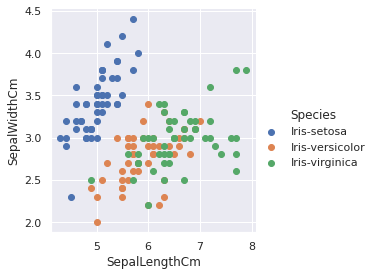

In [135]:
# Scatter plot showing species for each sample
sns.FacetGrid(df, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



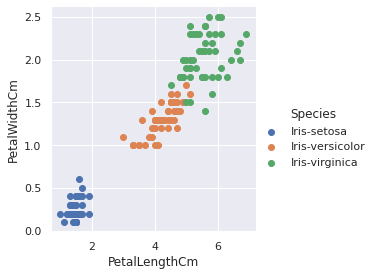

In [136]:
# For petals
sns.FacetGrid(df, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

In [137]:
# The species are nearly linearly separable with petal size, but sepal sizes are more mixed.

# But a clustering algorithm might have a hard time realizing that there were
# three separate species (Even if we know it by observation)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



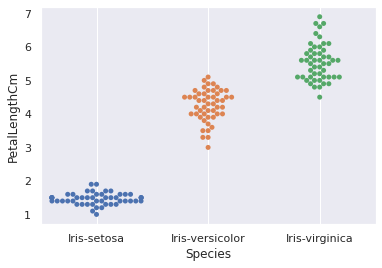

In [138]:
# Petal length distributions in a swarm plot - 
# One dimension of the data.
sns.swarmplot(x="Species", y="PetalLengthCm", data=df)
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



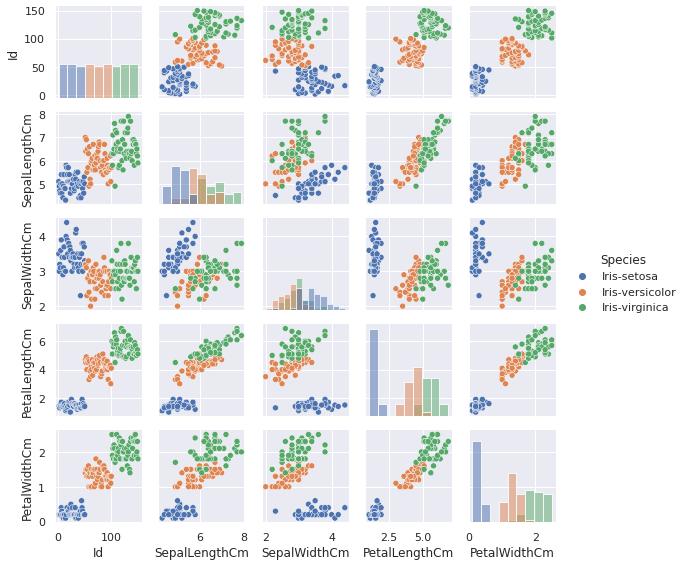

In [139]:
# Scatter matrix showing each pair of features in the data.
sns.pairplot(df, hue="Species", diag_kind="hist", size=1.6);

This again shows how similar versicolor and virginica are.

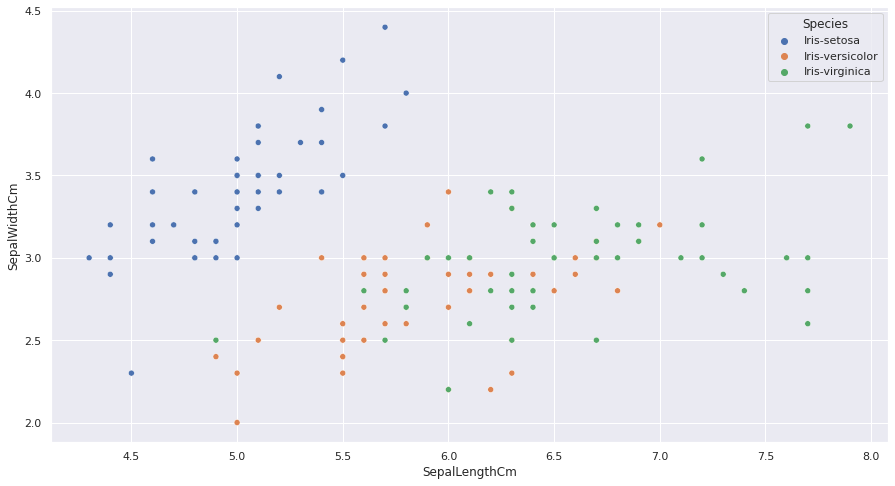

In [140]:
plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
sns.scatterplot(data=df,x="SepalLengthCm",y='SepalWidthCm',hue="Species")

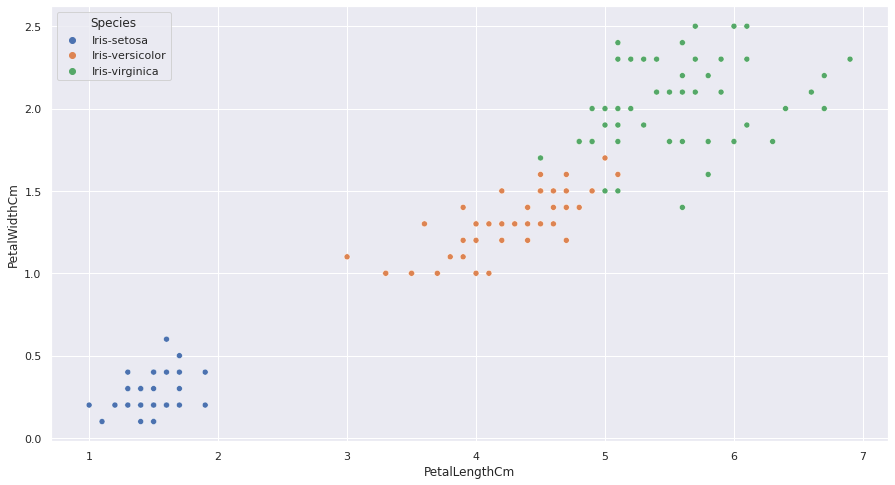

In [141]:
plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
sns.scatterplot(data=df,x="PetalLengthCm",y='PetalWidthCm',hue="Species")

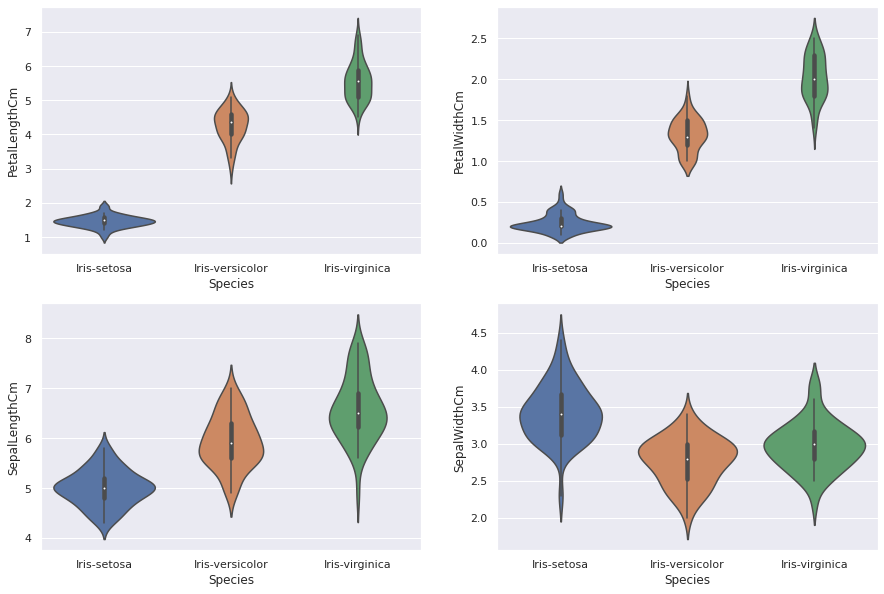

In [142]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

####**Conclusion:**
Iris-setosa are very easy to identify whereas the other 2 are mostly similar in nature.

# Feature Scaling

In [143]:
# So that larger features will not dominate the others in clustering.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
82,0.173209,-0.052506,-0.819166,0.080370
134,1.374124,0.310998,-1.050569,1.047087
114,0.912234,-0.052506,-0.587764,0.762759
42,-0.750572,-1.748856,0.337848,-1.398138
109,0.796761,1.643844,1.263460,1.331416


# K-Means Clustering

In [144]:
# There are 3 species, so let's find 3 species and see if the predictions for each point matches the label in y.

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [145]:
# The silhouette score. 
# Run that same code for different values of k and print the value for 

Silhouette score - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [146]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.42560414986156675

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



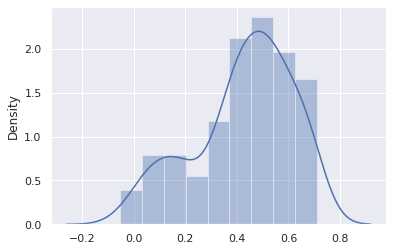

In [147]:
# Distribution of silhouette scores...
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

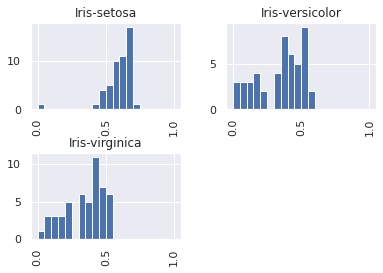

In [148]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = df['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

Versicolor and virginica have lower silhouette scores than 
the more separate setosas, because they are closer together.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



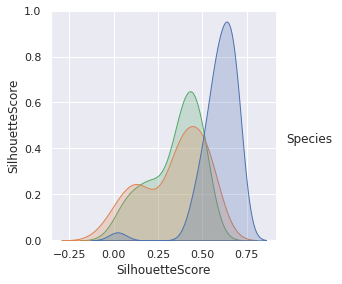

In [149]:
sns.pairplot(df_scores, hue="Species", size=4);

The blue species have higher silhouette scores


If we used the best mean silhouette score to try to find the best number of clusters k, we'd end up with 2 clusters, because the mean silhouette score in that case would be largest, since the clusters would be better separated. 

That's using k-means - gmm might give better results...

#  Principal Component Analysis (PCA)


Principal Component Analysis (PCA) remaps the data to a new (smaller) coordinate system which tries to account for the most information possible.


In [150]:
# Mash the data down into 2 dimensions

from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
135,2.753160,0.933083
12,-2.202148,-0.745410
68,0.957579,-1.579911
50,0.628535,0.925296
118,3.069312,0.121703


In [151]:
import matplotlib as mpl

# Convert species to an arbitrary number
y_id_array = pd.Series(df['Species'])

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')
    nclusters = 3

    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

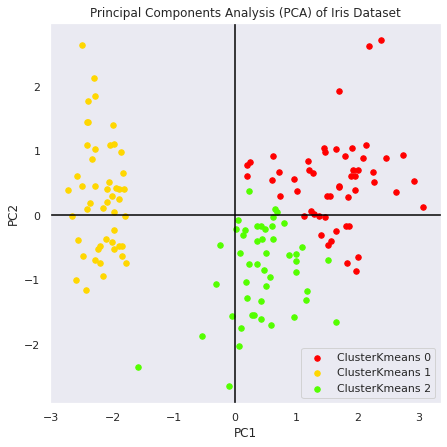

In [152]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

In [153]:
# plotData(df_plot, 'SpeciesId')

In [154]:
# k-means clustering did not find the correct clusterings

# they're the principal components, which pick out the directions 
# of maximal variation in the original data.
# PC1 finds the most variation, PC2 the second-most. 
# the rest of the data is basically thrown away when the data is reduced down to 2d.


# Gaussian Mixture Model (GMM) Clustering

In [155]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters, 
# and might be the case when measuring things like petal and sepal sizes...

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

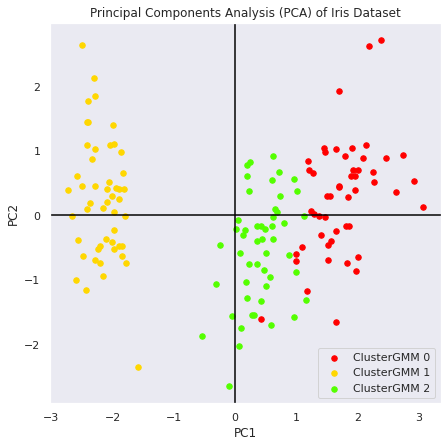

In [156]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

GMM did much better at finding the actual species clusters

GMM tries to fit normally distributed clusters, which is probably the case with this data, so it fit it better. k-means is biased towards spherically distributed clusters.

# Comparing k-Means and GMM clustering

In [157]:
from sklearn.metrics.cluster import adjusted_rand_score

# k-means clustering
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.694647633734363

In [158]:
# GMM clustering - 
score = adjusted_rand_score(y, y_cluster_gmm)
score

1.0

In [159]:
# so the GMM clustering matched the true labels more closely than the Kmeans,
# as expected from the plots.

# Visualization

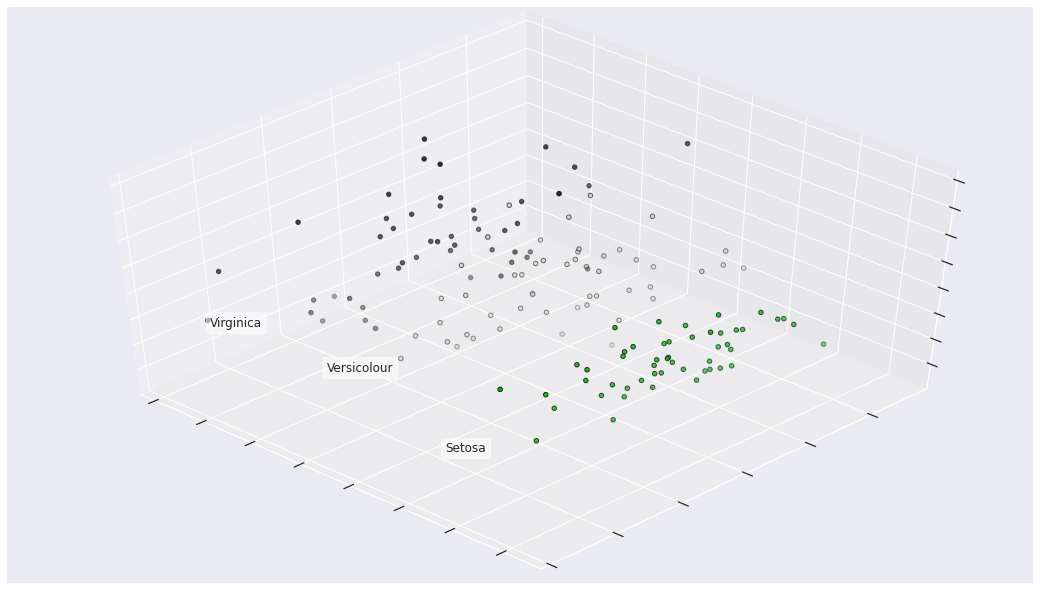

In [160]:
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(15, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## Visualize 2D Projection

[4.22824171 0.24267075]


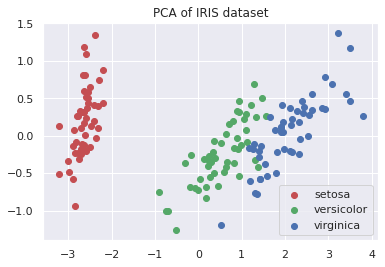

In [161]:
import pylab as pl

from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(pca.explained_variance_)

pl.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
   pl.scatter(X_r[y==i,0], X_r[y==i,1], c=c, label=target_name)
pl.legend()
pl.title('PCA of IRIS dataset')

pl.show()

# Visualize PCA with px.scatter_3d

In [162]:
import plotly.express as px
df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# Visualize Loadings

In [163]:
components = pca.fit_transform(X)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

***
***Conclusion:***

1) Clustering of the iris dataset based on all variables using Gaussian mixture models. was done.

2) PCA was used visualize clusters.

***